In [1]:
# https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html
# https://jaketae.github.io/study/pytorch-rnn/

In [9]:
import os
import random
from string import ascii_letters

import torch
from torch import nn
import torch.nn.functional as F
from unidecode import unidecode
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

from dataset import get_tensor, get_train_test_data
from model import GRUModel
from train import train, evaluate
from config import *

_ = torch.manual_seed(42)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(device)

cpu


In [3]:
data_dir = "../data/names"
tensor_names, target_langs, num_langs, num_letters = get_tensor(data_dir)
train_dataset, test_dataset = get_train_test_data(tensor_names, target_langs)

num_lang, 18 num_letters 59
Train: 18063
Test: 2007


In [4]:
names, labels = next(iter(train_dataset))
print(names.shape)
                     

torch.Size([10, 1, 59])


In [5]:
model = GRUModel(num_layers=num_layers, input_size=num_letters, hidden_size=hidden_size, num_classes=num_langs).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(device)

../model.py:21: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(self.fc.weight, mean=0., std=0.05)


In [6]:
acc_list = train(model, device, train_dataset, test_dataset, optimizer, criterion)

Epoch [1/4], Step [3000/18063], Loss: 1.4211
Accuracy: 68.1116%
Epoch [1/4], Step [6000/18063], Loss: 1.0353
Accuracy: 69.7559%
Epoch [1/4], Step [9000/18063], Loss: 0.9412
Accuracy: 72.3966%
Epoch [1/4], Step [12000/18063], Loss: 0.8397
Accuracy: 75.2367%
Epoch [1/4], Step [15000/18063], Loss: 0.8004
Accuracy: 75.3363%
Epoch [1/4], Step [18000/18063], Loss: 0.7736
Accuracy: 77.3293%
Epoch [2/4], Step [3000/18063], Loss: 0.6821
Accuracy: 77.6283%
Epoch [2/4], Step [6000/18063], Loss: 0.6389
Accuracy: 78.4255%
Epoch [2/4], Step [9000/18063], Loss: 0.6488
Accuracy: 79.6712%
Epoch [2/4], Step [12000/18063], Loss: 0.6025
Accuracy: 80.8171%
Epoch [2/4], Step [15000/18063], Loss: 0.6130
Accuracy: 81.3652%
Epoch [2/4], Step [18000/18063], Loss: 0.6174
Accuracy: 81.0164%
Epoch [3/4], Step [3000/18063], Loss: 0.5254
Accuracy: 81.3652%
Epoch [3/4], Step [6000/18063], Loss: 0.5039
Accuracy: 81.7140%
Epoch [3/4], Step [9000/18063], Loss: 0.4956
Accuracy: 81.5645%
Epoch [3/4], Step [12000/18063], L

In [7]:
evaluate(model, device, test_dataset)

Accuracy: 83.1091%


83.10911808669657

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


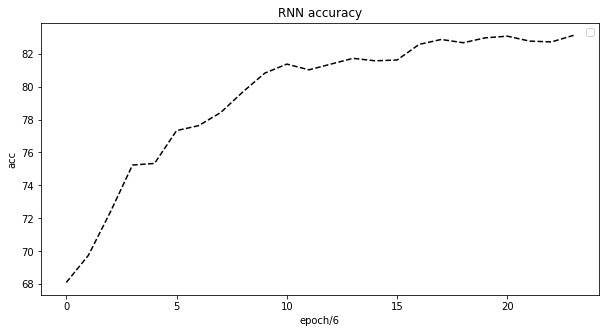

In [10]:
plt.figure(figsize=(10, 5))
plt.title('RNN accuracy')
plt.xlabel('epoch/6')
plt.ylabel('acc')
plt.legend(loc='best')
plt.plot(acc_list, 'k--')